# India House Price data

In [1]:
# ! pip install matplotlib==3.7.3

In [12]:
import sys
import os
import pandas as pd
import seaborn as sns
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))

module_path = Path.cwd().parent
# print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)
# print(sys.path)
import settings
# from kaggle import settingsb
%matplotlib inline

In [13]:
import matplotlib
matplotlib.__version__

'3.7.3'

In [14]:
! poetry show | grep matplotlib

matplotlib                               3.7.3        Python plotting package
matplotlib-inline                        0.1.6        Inline Matplotlib bac...


In [15]:
! pip freeze | grep matplotlib

matplotlib==3.7.3
matplotlib-inline @ file:///home/conda/feedstock_root/build_artifacts/matplotlib-inline_1660814786464/work


## Configuration

In [16]:
csv_file = settings.DATA_FOLDER /'house_prices_clean.csv'

In [17]:
df = pd.read_csv(csv_file)

df.shape

(29451, 13)

In [18]:
df.sample(5)

,unnamed0,posted_by,under_construction,rera,bhk_no,bhk_or_rk,square_ft,ready_to_move,resale,address,longitude,latitude,targetprice_in_lacs
28293,28293,Owner,0,0,2,BHK,1150.527325,1,1,"Dewas Naka(Panchvati),Indore",22.782781,75.899435,24.0
14088,14088,Dealer,0,0,3,BHK,920.162382,1,1,"Madurdaha,Kolkata",22.541110,88.337780,34.0
25591,25591,Dealer,1,1,2,BHK,1084.444444,0,0,"Sector-150 Noida,Noida",28.429614,77.481711,48.8
17532,17532,Dealer,0,1,3,BHK,1423.810966,1,1,"Mansarovar Extension,Jaipur",26.862600,75.763300,47.0
11736,11736,Dealer,1,0,4,BHK,2220.063827,0,1,"Lingarajapuram,Bangalore",13.008669,77.629239,160.0


## EDA

In [8]:
df.isna().sum()

Unnamed: 0             0
unnamed0               0
posted_by              0
under_construction     0
rera                   0
bhk_no                 0
bhk_or_rk              0
square_ft              0
ready_to_move          0
resale                 0
address                0
longitude              0
latitude               0
targetprice_in_lacs    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           29451 non-null  int64  
 1   unnamed0             29451 non-null  int64  
 2   posted_by            29451 non-null  object 
 3   under_construction   29451 non-null  int64  
 4   rera                 29451 non-null  int64  
 5   bhk_no               29451 non-null  int64  
 6   bhk_or_rk            29451 non-null  object 
 7   square_ft            29451 non-null  float64
 8   ready_to_move        29451 non-null  int64  
 9   resale               29451 non-null  int64  
 10  address              29451 non-null  object 
 11  longitude            29451 non-null  float64
 12  latitude             29451 non-null  float64
 13  targetprice_in_lacs  29451 non-null  float64
dtypes: float64(4), int64(7), object(3)
memory usage: 3.1+ MB


In [10]:
# pd.set_option('display.float_format', lambda x: f'{x:,.2f}')
df.describe()

,Unnamed: 0,unnamed0,under_construction,rera,bhk_no,square_ft,ready_to_move,resale,longitude,latitude,targetprice_in_lacs
count,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,14725.000000,14725.000000,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,8501.915725,8501.915725,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,7362.500000,7362.500000,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,14725.000000,14725.000000,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,22087.500000,22087.500000,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,29450.000000,29450.000000,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


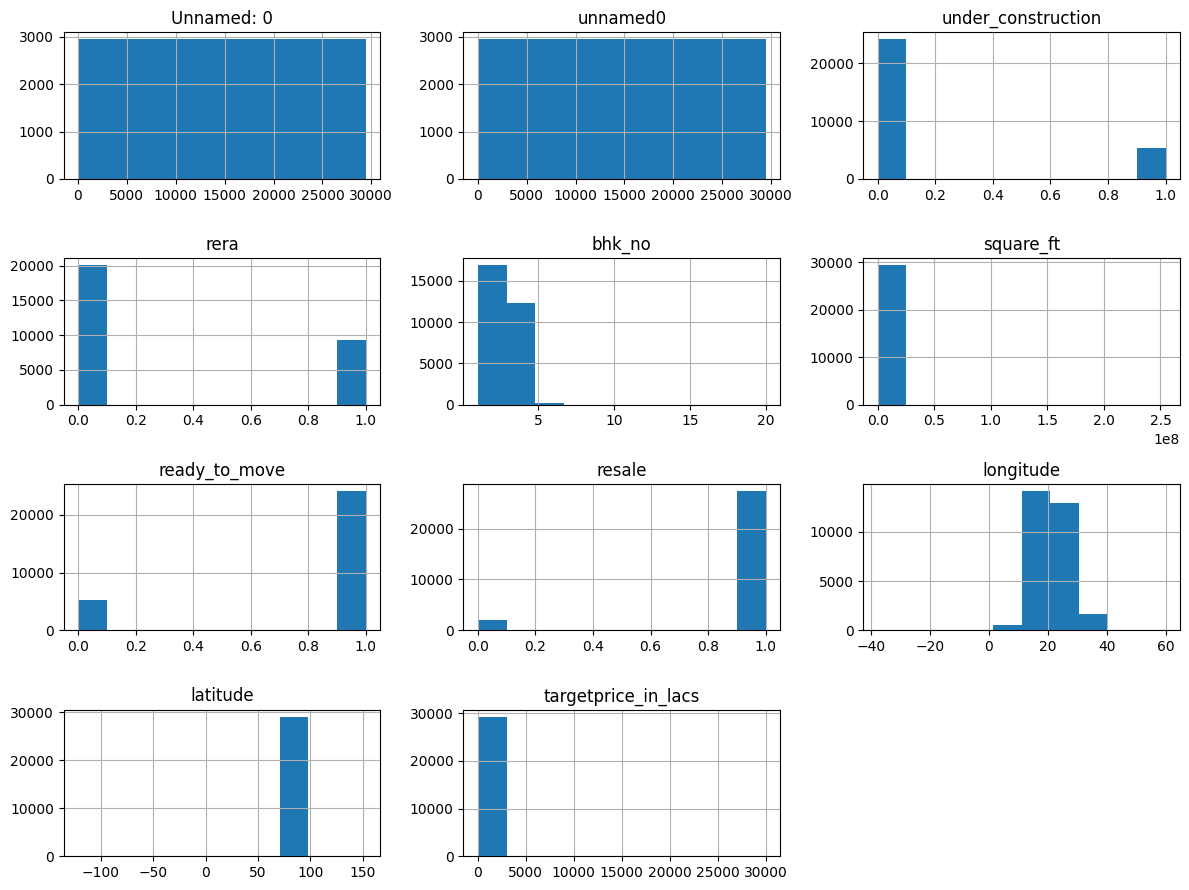

In [11]:
df.hist(figsize=(12,9))
plt.tight_layout()
plt.show()

In [ ]:
sns.boxplot(data=df, orient='h')

### Correlation

In [ ]:
df.corr()

In [ ]:

plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().round(2), annot=True, cmap='YlGnBu', annot_kws={"size": 10})
#sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [ ]:
import matplotlib
print(f'Pandas    : {pd.__version__}')
print(f'Seaborn   : {sns.__version__}')
print(f'Matplotlib: {matplotlib.__version__}')

In [ ]:
! cat /etc/os-release